###import pm4py

In [1]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py

# import sys
# sys.version

Importing the pm4py module
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.2 MB/s 
     |████████████████████████████████| 592 kB 52.9 MB/s 
     |████████████████████████████████| 1.6 MB 51.2 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.0-py3-none-any.whl size=600250 sha256=1988f3097e846d056c95426acea8eced40ca8a41aab9dabfe31f52be967e81e4
  Stored in directory: /root/.cache/pip/wheels/57/74/32/e404e0d76fbb2dc4e3791b821cfae6a69c1a6677ded99dc8b7
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23602 sha256=cdada908d2f2168307b28126552234c8a1a83ef9269b932900f8e39430559f0e
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


###Sviluppo codice process mining parte 1 (da log)

#### sviluppo iniziale

In [ ]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py


from pandas import read_csv, concat
from pm4py import discover_dfg, get_start_activities, get_end_activities, view_dfg, format_dataframe

flag = True

def enhance_dfg(new_dfg):
    global dfg
    keys = dfg.keys()
    for edge in new_dfg.keys():
        if edge in keys:
            dfg[edge] += new_dfg[edge]
        else:
            dfg[edge] = new_dfg[edge]

def get_dfg(log):
    # if not (dfg is None):
    new_dfg, _, _ = discover_dfg(log)
    print(new_dfg)
    enhance_dfg(new_dfg)
    global start_activities, end_activities
    start_activities = get_start_activities(df)
    end_activities = get_end_activities(df)
    # else:
    #     dfg, start_activities, end_activities = discover_dfg(log)
    
    print("#start activities: {}\n#end activities: {}".format(start_activities, end_activities))

    print(f"{'visualizing DFG model':^64}\n")
    view_dfg(dfg, start_activities, end_activities)
    print("\n\n")

def from_log_to_dfg(file_path):
    global flag, df, dfg, start_activities, end_activities
    if flag:
        df = format_dataframe(read_csv(file_path, sep=';'), case_id='case', activity_key='activity', timestamp_key='time')
        print(df)
        df.sort_values(["case", "activity"])
        print(df)
        dfg, start_activities, end_activities = discover_dfg(df)
        print("#start activities: {}\n#end activities: {}".format(start_activities, end_activities))
        print(f"{'visualizing DFG model':^64}\n")
        view_dfg(dfg, start_activities, end_activities)
        print("\n\n")
        flag = not flag
    else:
        print(df.tail(1))
        new_df = format_dataframe(read_csv(file_path, sep=';'), case_id='case', activity_key='activity', timestamp_key='time')
        log = concat([df.tail(1), new_df], ignore_index=True)
        df = concat([df, new_df], ignore_index=True)
        
        print("LOG:\n", log)
        # dfg, start_activities, end_activities = get_dfg(log, dfg)
        get_dfg(log)
        df.to_csv("Saved_event_log.csv", sep=';')
        
    num_events = len(df)
    num_cases = len(df.case.unique())
    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))
    print(dfg)
    

def setFlag():
    global flag
    flag = True

if __name__ == "__main__":
    print(f"\n\n{'parsing entire file log':64}\n\n")
    from_log_to_dfg("event_log_choice_1_1000.csv")
    setFlag()
    print(f"\n\n{'parsing different file logs':64}\n\n")
    from_log_to_dfg("Starting_event_log.csv")
    from_log_to_dfg("New_event_log.csv")
    from_log_to_dfg("New_event_log2.csv")
    setFlag()
    print(f"\n\n{'parsing saved file log':64}\n\n")
    from_log_to_dfg("Saved_event_log.csv")


#### secondo sviluppo

In [ ]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py


from pandas import read_csv, concat, set_option
from pm4py import discover_dfg, get_start_activities, get_end_activities, view_dfg, format_dataframe

flag = True

def enhance_dfg(new_dfg):
    global dfg
    keys = dfg.keys()
    for edge in new_dfg.keys():
        if edge in keys:
            dfg[edge] += new_dfg[edge]
        else:
            dfg[edge] = new_dfg[edge]

def get_dfg(log):
    new_dfg, _, _ = discover_dfg(log)
    enhance_dfg(new_dfg)
    global start_activities, end_activities
    start_activities = get_start_activities(df)
    end_activities = get_end_activities(df)
    
    print("#start activities: {}\n#end activities: {}".format(start_activities, end_activities))

    print(f"{'visualizing DFG model':^64}\n")
    view_dfg(dfg, start_activities, end_activities)
    print("\n\n")

def from_log_to_dfg(file_path):
    global flag, df, dfg, start_activities, end_activities
    if flag:
        df = read_csv(file_path, sep=';').rename(columns = {'case':'case:concept:name', 'activity':'concept:name', 'time':'time:timestamp'}, inplace = True)
        print(df.head(100).to_markdown())
        # df = format_dataframe(read_csv(file_path, sep=';'), case_id='case', activity_key='activity', timestamp_key='time')
        # print("MY DF:\n", df.head(100).to_markdown())
        # df.sort_values(["case", "activity"], 
        #             axis=0,
        #             ascending=[True, True], 
        #             inplace=True)
        # print("After sorting:\n", df.head(100).to_markdown())
        dfg, start_activities, end_activities = discover_dfg(df)

        print("#start activities: {}\n#end activities: {}".format(start_activities, end_activities))

        print(f"{'visualizing DFG model':^64}\n")
        view_dfg(dfg, start_activities, end_activities)
        print("\n\n")
        flag = not flag
    else:
        print("DF ad ora...\n", df.tail(1), "\n", df.tail(1)['case:concept:name'])
        new_df = read_csv(file_path, sep=';').rename(columns = {'case':'case:concept:name', 'activity':'concept:name', 'time':'time:timestamp'}, inplace = True)
        print("NEW_DF ad ora...\n",new_df.head(1), "\n", new_df.head(1)['case:concept:name'])
        # print("MY DF:\n", df.head(100).to_markdown())
        # new_df.sort_values(["case", "activity"], 
        #             axis=0,
        #             ascending=[True, True], 
        #             inplace=True)
        # print("after sorting...\n", df.head(100))
        if df.tail(1)['case:concept:name'].equals(new_df.head(1)['case:concept:name']):
            print("\n\t\tSONO UGUALI!!! si devono attaccare\n")
            log = concat([df.tail(1), new_df], ignore_index=True)
        else:
            log = new_df
        df = concat([df, new_df], ignore_index=True)
        print("LOG:\n", log)
        # dfg, start_activities, end_activities = get_dfg(log, dfg)
        get_dfg(log)
        df.to_csv("Saved_event_log.csv", sep=';')
        
    # num_events = len(df)
    # num_cases = len(df.case.unique())
    # print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))
    # print(dfg)
    

def setFlag():
    global flag
    flag = True

if __name__ == "__main__":
    print(f"\n\n{'parsing entire file log sorted':64}\n\n")
    from_log_to_dfg("prova.csv")
    setFlag()
    # print(f"\n\n{'parsing different file logs':64}\n\n")
    # from_log_to_dfg("Starting_event_log.csv")
    # from_log_to_dfg("New_event_log.csv")
    # from_log_to_dfg("New_event_log_2.csv")
    # setFlag()
    # print(f"\n\n{'parsing saved file log':64}\n\n")
    # from_log_to_dfg("Saved_event_log.csv")


#### terzo sviluppo

Importing the pm4py module
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 592 kB 48.8 MB/s 
     |████████████████████████████████| 1.6 MB 39.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.0-py3-none-any.whl size=600250 sha256=bab4e525888c5e097df64564fee3b12befdc54cd53dc49e1f3c2d15b673c6605
  Stored in directory: /root/.cache/pip/wheels/57/74/32/e404e0d76fbb2dc4e3791b821cfae6a69c1a6677ded99dc8b7
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23602 sha256=c9f6f4ee499e71dfdf9f727b9980b375ef2d46070002a60faa7e87c133843ada
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


parsing csv file log                                            


|    |   case:concept:name | concept:name   | time:timestamp    

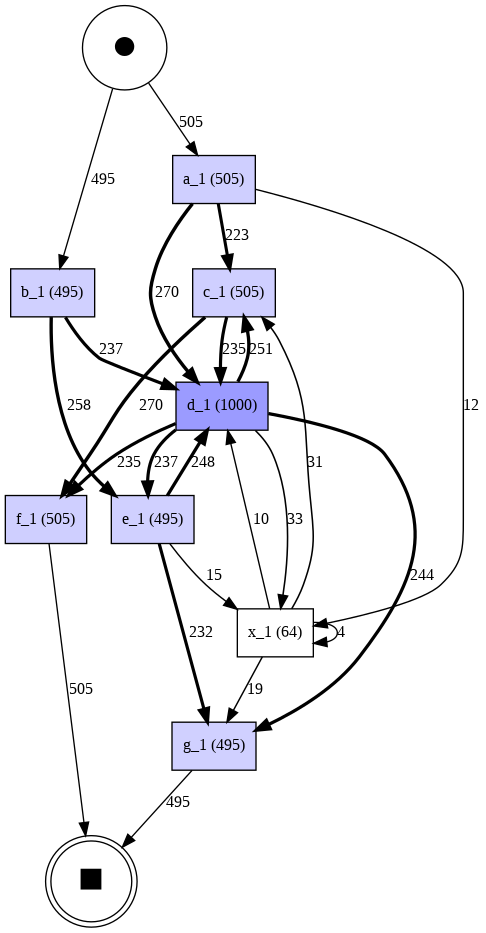






parsing different file logs                                     


|    |   case:concept:name | concept:name   | time:timestamp      |
|---:|--------------------:|:---------------|:--------------------|
|  0 |                   1 | a_1            | 05/01/2015 00.02.05 |
|  1 |                   1 | c_1            | 05/01/2015 00.02.05 |
|  2 |                   1 | d_1            | 05/01/2015 00.02.11 |
|  3 |                   1 | f_1            | 05/01/2015 00.02.27 |
|  4 |                   2 | a_1            | 05/01/2015 00.02.19 |
|  5 |                   2 | d_1            | 05/01/2015 00.02.21 |
|  6 |                   2 | c_1            | 05/01/2015 00.06.48 |
|  7 |                   2 | f_1            | 05/01/2015 00.06.53 |
|  8 |                   3 | b_1            | 05/01/2015 00.09.57 |
|  9 |                   3 | e_1            | 05/01/2015 00.10.02 |
| 10 |                   3 | d_1            | 05/01/2015 00.11.25 |
| 11 |                   3 | g_1            

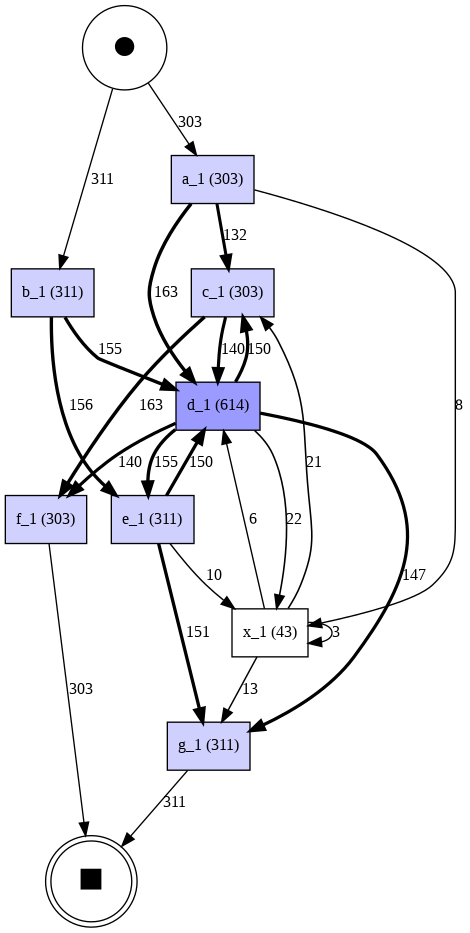




#start activities: {'a_1': 454, 'b_1': 453}
#end activities: {'f_1': 454, 'g_1': 453}
                     visualizing DFG model                      



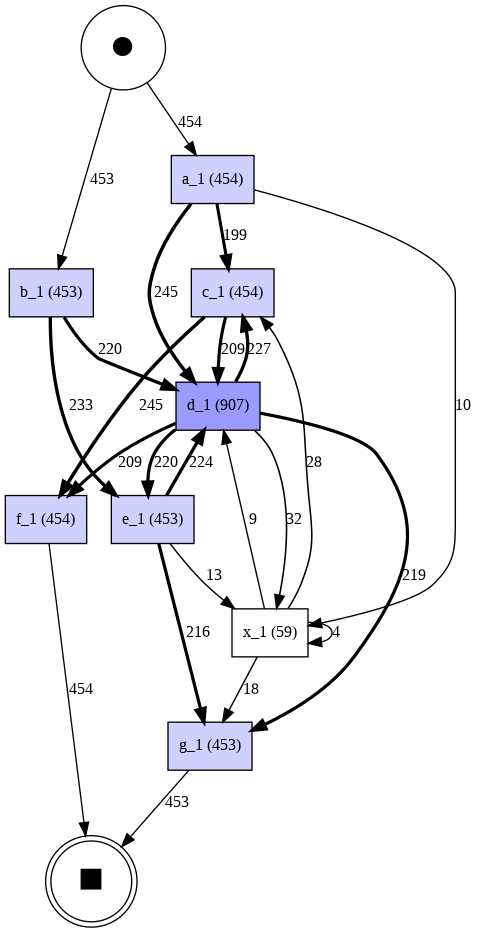




#start activities: {'a_1': 505, 'b_1': 495}
#end activities: {'f_1': 505, 'g_1': 495}
                     visualizing DFG model                      



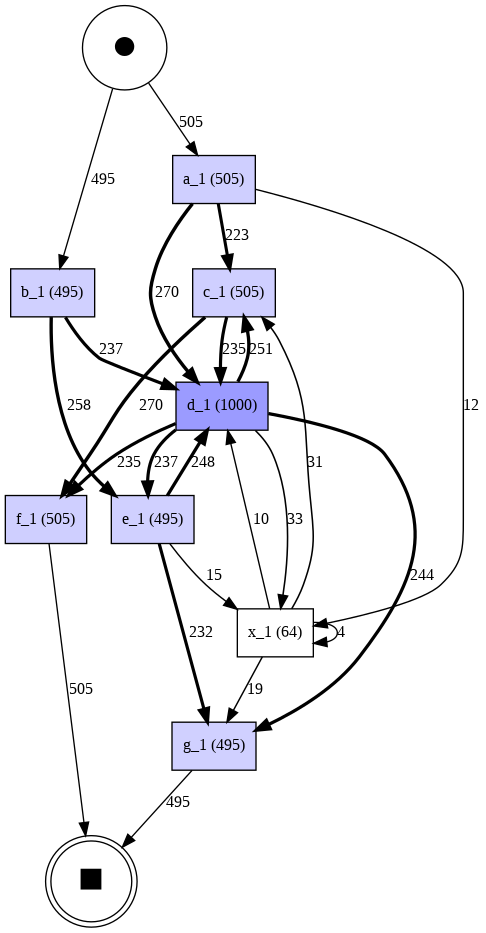






parsing saved file log                                          


|    |   case:concept:name | concept:name   | time:timestamp      | start_timestamp     |
|---:|--------------------:|:---------------|:--------------------|:--------------------|
|  0 |                   1 | a_1            | 05/01/2015 00.02.05 | 05/01/2015 00.02.05 |
|  1 |                   1 | c_1            | 05/01/2015 00.02.05 | 05/01/2015 00.02.05 |
|  2 |                   1 | d_1            | 05/01/2015 00.02.11 | 05/01/2015 00.02.11 |
|  3 |                   1 | f_1            | 05/01/2015 00.02.27 | 05/01/2015 00.02.27 |
|  4 |                   2 | a_1            | 05/01/2015 00.02.19 | 05/01/2015 00.02.19 |
|  5 |                   2 | d_1            | 05/01/2015 00.02.21 | 05/01/2015 00.02.21 |
|  6 |                   2 | c_1            | 05/01/2015 00.06.48 | 05/01/2015 00.06.48 |
|  7 |                   2 | f_1            | 05/01/2015 00.06.53 | 05/01/2015 00.06.53 |
|  8 |                   3 |

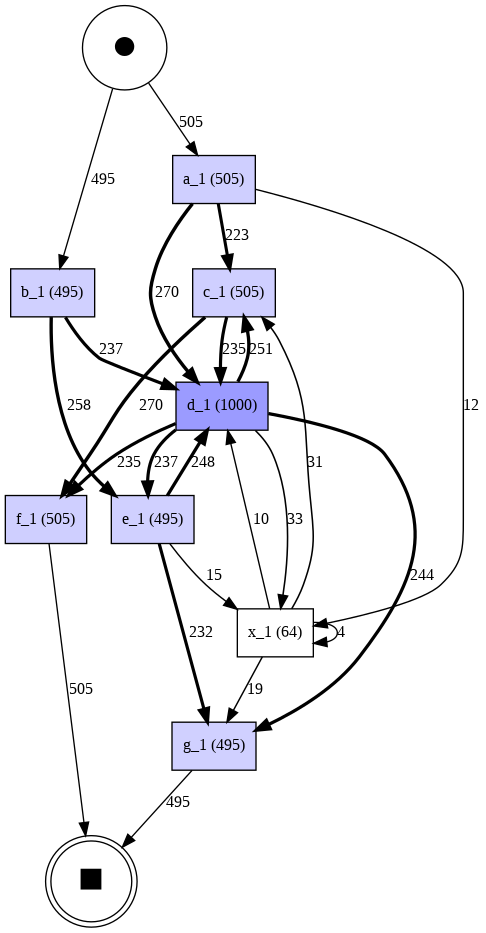

In [1]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py

from os.path import basename
from re import split
from pandas import read_csv, concat
from pm4py import discover_dfg, get_start_activities, get_end_activities, view_dfg, read_xes, convert_to_dataframe

flag = True

def enhance_dfg(new_dfg):
    global dfg
    keys = dfg.keys()
    for edge in new_dfg.keys():
        if edge in keys:
            dfg[edge] += new_dfg[edge]
        else:
            dfg[edge] = new_dfg[edge]


def get_dfg(log):
    new_dfg, _, _ = discover_dfg(log)
    enhance_dfg(new_dfg)
    global start_activities, end_activities
    start_activities = get_start_activities(df)
    end_activities = get_end_activities(df)


def check_df_read(new_df):
    if df.tail(1)['case:concept:name'].equals(new_df.head(1)['case:concept:name']):
        return concat([df.tail(1), new_df], ignore_index=True)
    return new_df


def reading_from_file(file, index_col = None):
    file_elems = split(pattern=r'\.', string=basename(file))
    if file_elems[-1] == "csv" :
        if file_elems[0] == "Saved_event_log" :
            index_col = 0
        return read_csv(file, sep=';', index_col = index_col).rename(columns = {'case':'case:concept:name', 'activity':'concept:name', 'time':'time:timestamp'})
    return convert_to_dataframe(read_xes(file)).rename(columns={'event_attr: E:time:time':'time:timestamp'})


def from_log_to_dfg(file_path):
    global flag, df, dfg, start_activities, end_activities
    if flag:
        df = reading_from_file(file_path)
        print(df.head(20).to_markdown())
        dfg, start_activities, end_activities = discover_dfg(df)
        flag = not flag
    else:
        new_df = reading_from_file(file_path)
        log = check_df_read(new_df)
        df = concat([df, new_df], ignore_index=True)
        get_dfg(log)
        df.to_csv("Saved_event_log.csv", sep=';')

    print("#start activities: {}\n#end activities: {}".format(start_activities, end_activities))
    print(f"{'visualizing DFG model':^64}\n")
    view_dfg(dfg, start_activities, end_activities)
    print("\n\n")
    

def setFlag():
    global flag
    flag = True


if __name__ == "__main__":
    print(f"\n\n{'parsing csv file log':64}\n\n")
    from_log_to_dfg("event_log_choice_1_1000.csv")
    # setFlag()
    # print(f"\n\n{'parsing xes file log':64}\n\n")
    # from_log_to_dfg("event_log_choice_1_1000.xes")
    setFlag()
    print(f"\n\n{'parsing different file logs':64}\n\n")
    from_log_to_dfg("Starting_event_log.csv")
    from_log_to_dfg("New_event_log.csv")
    from_log_to_dfg("New_event_log_2.csv")
    setFlag()
    print(f"\n\n{'parsing saved file log':64}\n\n")
    from_log_to_dfg("Saved_event_log.csv")

###Sviluppo codice process mining parte 2

##### lettura file

In [ ]:
def reading_from_file(file):
    from os.path import basename
    from re import split
    from pm4py import read_xes, convert_to_dataframe
    from pandas import read_csv

    if split(pattern=r'\.', string=basename(file))[-1] == "csv" :
        print("\n\tletto file csv...")
        var = read_csv(file, sep=';').rename(columns={'case':'case:concept:name', 'activity':'concept:name', 'time':'time:timestamp'})
        print(var.head(50).to_markdown())
        return var
    # else: # is a xes file
    print("\t\tLETTO FILE XES!")
    var = read_xes(file)
    for index in range(50):
        print(var[index])
    var = convert_to_dataframe(var).rename(columns={'event_attr: E:time:time':'time:timestamp'})
    print(var.head(50).to_markdown())
    return var
    

if __name__ == "__main__":
    my_log = reading_from_file("event_log_choice_1_1000.xes")
    print(my_log)
    print("\n", pm4py.utils.get_properties(my_log))
    my_log = reading_from_file("event_log_choice_1_1000.csv")
    print(my_log)
    print("\n", pm4py.utils.get_properties(my_log))

#### primo sviluppo

In [ ]:
from pm4py import read_xes
from pm4py.streaming.stream.live_event_stream import LiveEventStream, Parameters
from pm4py.streaming.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pandas import DataFrame, read_csv, concat

flag = True

def reading_from_file(file, flag = False):
    if split(pattern=r'\.', string=basename(file))[-1] == "csv" :
        return read_csv(file, sep=';').rename(columns = {'case':'case:concept:name', 'activity':'concept:name', 'time':'time:timestamp'})
    return convert_to_dataframe(read_xes(file)).rename(columns={'event_attr: E:time:time':'time:timestamp'})

def extracting_event_log(file):
    global flag, log
    if flag:
        log = reading_from_file(file, True) 
        flag = not flag
    else:
        new_log = reading_from_file(file)
    print(len(log))


def enhance_dfg(new_dfg):
    global dfg
    keys = dfg.keys()
    for edge in new_dfg.keys():
        if edge in keys:
            dfg[edge] += new_dfg[edge]
        else:
            dfg[edge] = new_dfg[edge]
    

def dfg_production(stream, dfg):
    global log
    # gets the DFG along with the start and end activities from the stream
    new_dfg, _, _, _ = stream.get()
    enhance_dfg(new_dfg)
    start_activities = pm4py.get_start_activities(log)
    end_activities = pm4py.get_end_activities(log)
    # visualize the DFG
    print(f"{'DFG TEST':^64}\n")
    pm4py.view_dfg(dfg, start_activities, end_activities)
    print("\n\n")


def execute_script(file_path):
    extracting_event_log(file_path)

    event_stream = pm4py.convert_to_event_stream(log)
    # creates a live event stream (an object that distributes the messages to the algorithm)
    live_stream = LiveEventStream()

    print("\nstate = ", live_stream.state, "\n")
    print("\nparameters = ", Parameters.THREAD_POOL_SIZE, "\n")
    # creates the streaming DFG discovery object
    stream_dfg_disc = dfg_discovery.apply()
    # register the discovery algorithm to the stream
    live_stream.register(stream_dfg_disc)


    # start the recording of events from the live event stream
    live_stream.start()
    # append each event of the original log to the live event stream
    # (so it is sent to the conformance checking algorithm)
    print("\nstate = ", live_stream.state, "\n")

    for index, event in enumerate(event_stream):
        live_stream.append(event)
        if (index + 1) % 500 == 0:
            print("INDEX è ", index, "\n")
            dfg_production(stream_dfg_disc)
            # dfg, activities, start_activities, end_activities = stream_dfg_disc.get()

    print("\nstate = ", live_stream.state, "\n")

    # stops the live event stream
    live_stream.stop()
    # gets the DFG along with the start and end activities from the stream
    dfg_production(stream_dfg_disc)

    from pprint import pprint
    pprint(vars(live_stream))
    print("\nstate = ", live_stream.state, "\n")
    print("\nparameters = ", Parameters.THREAD_POOL_SIZE, "\n")
    
    live_stream.start()
    print("\nstate = ", live_stream.state, "\n")
    print("\nparameters = ", Parameters.THREAD_POOL_SIZE, "\n")
    for index, event in enumerate(event_stream):
        print(index, "\t")
        live_stream.append(event)
        if index % 500 == 0 and index:
            break
    print("\nstate = ", live_stream.state, "\n")
    # stops the live event stream
    live_stream.stop()
    dfg, activities, start_activities, end_activities = stream_dfg_disc.get()
    # visualize the DFG
    print(f"{'DFG TEST':^64}\n")
    pm4py.view_dfg(dfg, start_activities, end_activities)
    print("\n\n")
    

if __name__ == "__main__":
    execute_script("event_log_choice_1_1000.csv")
    execute_script("event_log_choice_1_1000.xes")

    # execute_script("event_log_choice_5_1000.csv")
    # extracting_event_log()

#### secondo sviluppo

                          INITIAL DFG                           



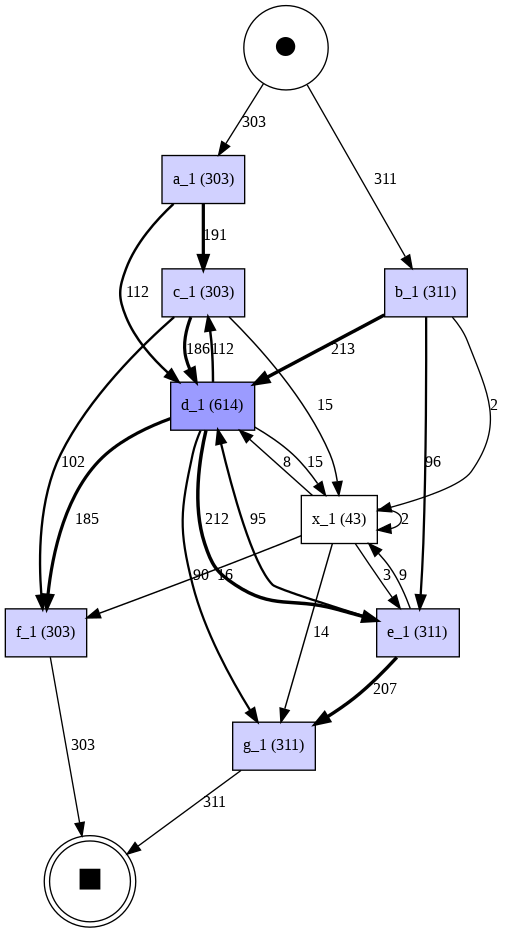




<class 'pandas.core.frame.DataFrame'>
file rows are: 1190
|    |   case:concept:name | concept:name   | time:timestamp   |
|---:|--------------------:|:---------------|:-----------------|
|  0 |                 615 | a_1            | 05/01/2015 10:18 |
|  1 |                 615 | c_1            | 05/01/2015 10:20 |
|  2 |                 615 | d_1            | 05/01/2015 10:19 |
|  3 |                 615 | f_1            | 05/01/2015 10:21 |
|  4 |                 616 | b_1            | 05/01/2015 10:19 |
|  5 |                 616 | d_1            | 05/01/2015 10:20 |
|  6 |                 616 | e_1            | 05/01/2015 10:21 |
|  7 |                 616 | g_1            | 05/01/2015 10:21 |
|  8 |                 617 | b_1            | 05/01/2015 10:21 |
|  9 |                 617 | d_1            | 05/01/2015 10:22 |
| 10 |                 617 | e_1            | 05/01/2015 10:22 |
| 11 |                 617 | g_1            | 05/01/2015 10:24 |
| 12 |                 618 | 

TypeError: ignored

In [ ]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py

from os.path import basename
from os import rename, remove
from re import split
from pm4py.streaming.stream.live_event_stream import LiveEventStream
from pm4py.streaming.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.convert import convert_to_event_stream, convert_to_dataframe
from pm4py.objects.log.obj import EventStream
from pm4py import discover_dfg, view_dfg, get_start_activities, get_end_activities
from pandas import DataFrame, read_csv, concat

show = False
online = False
address = "127.0.0.1"
port = "8192"
from_csv_to_dfg = {'case':'case:concept:name', 'activity':'concept:name', 'time':'time:timestamp'}
from_dfg_to_csv = {'case:concept:name':'case', 'concept:name':'activity', 'time:timestamp':'time'}


def reading_from_file(file):
    if split(pattern=r'\.', string=basename(file))[-1] == "csv" :
        df = read_csv(file, sep=';').rename(columns = from_csv_to_dfg)
    else:
        df = convert_to_dataframe(read_xes(file)).rename(columns={'event_attr: E:time:time':'time:timestamp'})
    return df


def enhance_dfg(new_dfg):
    global dfg
    keys = dfg.keys()
    for edge in new_dfg.keys():
        if edge in keys:
            dfg[edge] += new_dfg[edge]
        else:
            dfg[edge] = new_dfg[edge]


def dfg_production(stream):
    dfg_stream, _, _, _ = stream.get()
    enhance_dfg(dfg_stream)
    global start_activities, end_activities
    start_activities = get_start_activities(total_log)
    end_activities = get_end_activities(total_log)
    
    if show:
        print(f"{'DFG TEST':^64}\n")
        view_dfg(dfg, start_activities, end_activities)
        print("\n\n")


def log_stream_from_file(total_log, df, live_stream, stream_dfg_disc, window):
    print("In log_stream_from_file, df is", type(df))
    log = DataFrame()
    i = 0
    live_stream.start()
    last_case = '' 

    # fase processazione eventi:
    # iterrows estrae eventi e li trasforma in elemento Series
    # per cui devo re-castare a elemento Dataframe
    for index, event in df.iterrows():#enumerate(df, start = 1):
        # print(type(event))
        # #event = DataFrame(event)
        # print(event)
        # #print(event)
        # print(event["case:concept:name"])
        
        if len(log) != 0 and event['case:concept:name'] != last_case:
            # print("INDEX è ", index, "\n")
            total_log = concat([total_log, log], ignore_index=True)
            dfg_production(stream_dfg_disc)
            total_log.copy().rename(columns=from_dfg_to_csv).to_csv("Saved_event_log", sep=';')
            # evento ricevuto non ancora inserito;
            # eliminazione del dataframe presente
            log.drop(range(index - i))
            print("\nÈ", log.empty, "\n")
            log.append(event)
            last_case = event['case:concept:name']
            i = index
            continue
        else:
            return
            if not index:
                last_case = event['case:concept:name']
            live_stream.append(convert_to_event_stream(event.to_frame()))
            log = concat([log, event], ignore_index=True)
            print("Adding new event...", type(log))

        # if index - i == window:
        #     total_log = concat([total_log, log], ignore_index=True)
        #     dfg_production(stream_dfg_disc)
        #     total_log.copy().rename(columns=from_dfg_to_csv).to_csv("Saved_event_log", sep=';')
        #     log.drop(range(index - i))
        #     print("\nÈ", log.empty, "\n")
        #     log.append(event)
        #     i = index


    live_stream.stop()
    total_log = concat([total_log, log], ignore_index=True)
    dfg_production(stream_dfg_disc)
    total_log.rename(columns=from_dfg_to_csv).to_csv("Saved_event_log", sep=';')


def execute_script(file_path, window = 8):
    live_stream = LiveEventStream()
    stream_dfg_disc = dfg_discovery.apply()
    live_stream.register(stream_dfg_disc)

    if online:
        event_stream = EventStream()
        #...
    else:
        event_log = reading_from_file(file_path)
        print("Event_log type =", type(event_log))
        
        log_stream_from_file(total_log, event_log, live_stream, stream_dfg_disc, window)
    
    # remove("Starting_event_log.csv")
    # rename("Saved_event_log.csv", "Starting_event_log.csv")


if __name__ == "__main__":
    global total_log
    total_log = read_csv("Starting_event_log.csv", sep=';').rename(columns = from_csv_to_dfg)
    global dfg, start_activities, end_activities 
    dfg, start_activities, end_activities = discover_dfg(total_log)

    print(f"{'INITIAL DFG ':^64}\n")
    view_dfg(dfg, start_activities, end_activities)
    print("\n\n")

    execute_script("New_event_log.csv")
    execute_script("New_event_log_2.csv", 4)
    print(f"\n\n{'TOTAL DFG':^64}\n")
    view_dfg(dfg, start_activities, end_activities)    
    dfg_t, s_a, e_a = discover_dfg(read_csv("event_log_choice_1_1000.csv", sep=';').rename(columns=from_csv_to_dfg))
    print(f"\n\n{'DFG FROM ORIGINAL CSV FILE':^64}\n")
    view_dfg(dfg_t, s_a, e_a)
    dfg_t, s_a, e_a = discover_dfg(read_csv("Starting_event_log.csv", sep=';').rename(columns=from_csv_to_dfg))
    print(f"\n\n{'DFG FROM EVENT LOGS GATHERED':^64}\n")
    view_dfg(dfg_t, s_a, e_a)

#### secondo sviluppo 2

                          INITIAL DFG                           



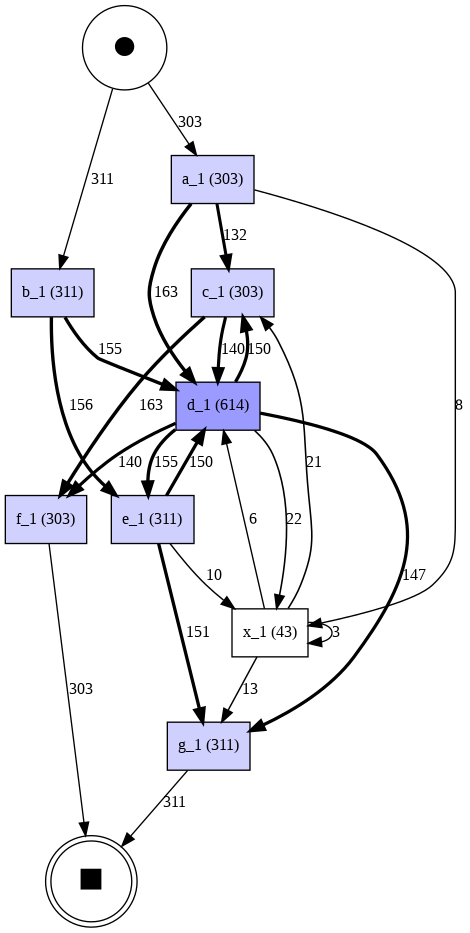




                            DFG TEST                            



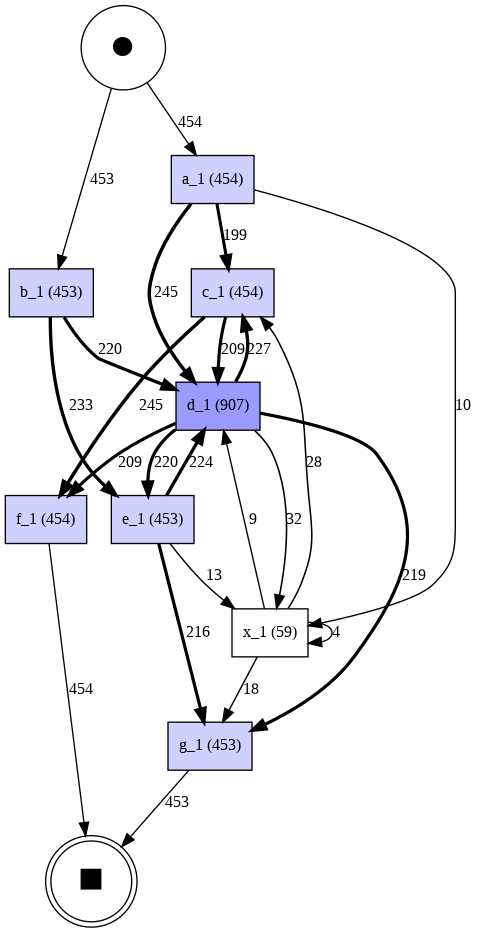




	Finestra di eventi piena!
{}
{('b_1', 'd_1'): 1, ('e_1', 'g_1'): 1, ('d_1', 'e_1'): 1}
{('d_1', 'g_1'): 1, ('d_1', 'e_1'): 1, ('e_1', 'd_1'): 1, ('e_1', 'g_1'): 1, ('b_1', 'd_1'): 1, ('b_1', 'e_1'): 1}
{('d_1', 'g_1'): 1, ('d_1', 'e_1'): 1, ('d_1', 'f_1'): 1, ('e_1', 'd_1'): 1, ('e_1', 'g_1'): 1, ('b_1', 'd_1'): 1, ('c_1', 'd_1'): 1, ('b_1', 'e_1'): 1, ('a_1', 'c_1'): 1}
{('d_1', 'g_1'): 1, ('d_1', 'e_1'): 1, ('d_1', 'f_1'): 2, ('e_1', 'd_1'): 1, ('e_1', 'g_1'): 1, ('b_1', 'd_1'): 1, ('c_1', 'd_1'): 2, ('b_1', 'e_1'): 1, ('a_1', 'c_1'): 2}
{('d_1', 'g_1'): 1, ('c_1', 'f_1'): 1, ('a_1', 'd_1'): 1, ('d_1', 'e_1'): 1, ('d_1', 'f_1'): 2, ('e_1', 'd_1'): 1, ('e_1', 'g_1'): 1, ('d_1', 'c_1'): 1, ('b_1', 'd_1'): 1, ('c_1', 'd_1'): 2, ('b_1', 'e_1'): 1, ('a_1', 'c_1'): 2}
{('d_1', 'g_1'): 1, ('c_1', 'f_1'): 2, ('a_1', 'd_1'): 2, ('d_1', 'e_1'): 1, ('d_1', 'f_1'): 2, ('e_1', 'd_1'): 1, ('e_1', 'g_1'): 1, ('d_1', 'c_1'): 2, ('b_1', 'd_1'): 1, ('c_1', 'd_1'): 2, ('b_1', 'e_1'): 1, ('a_1', 'c_

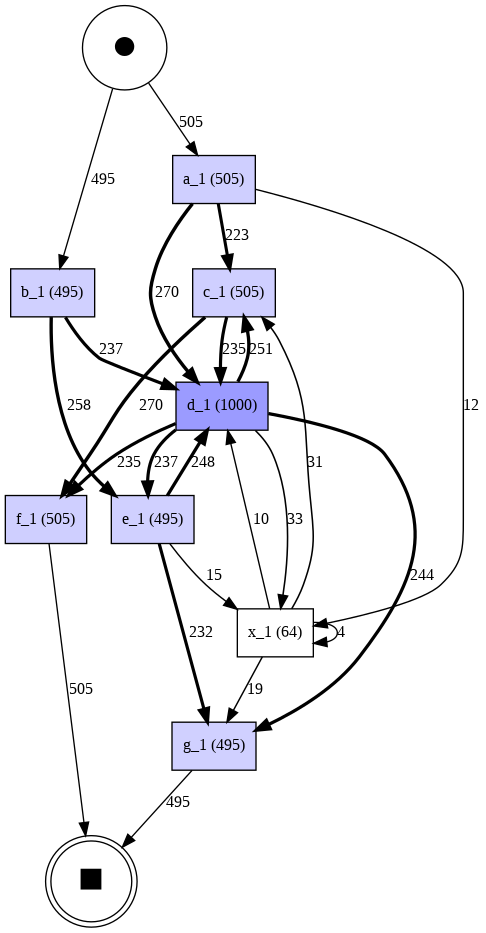






                           TOTAL DFG                            



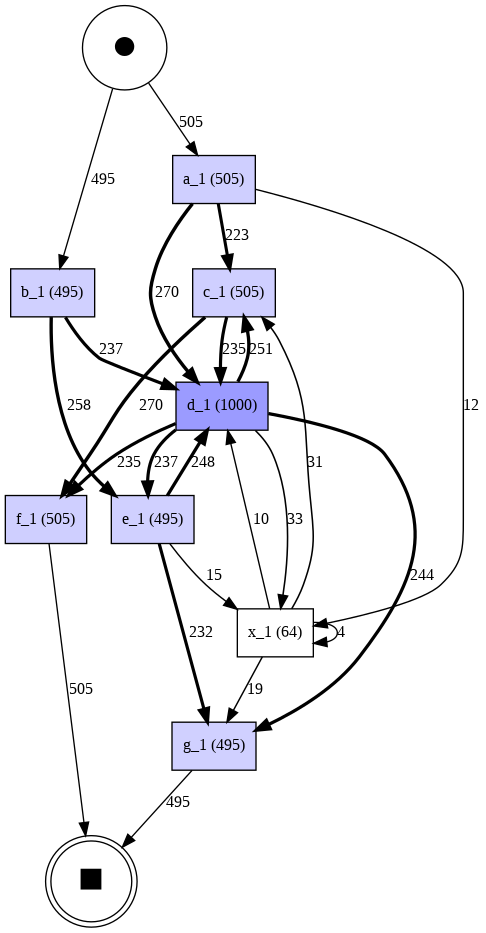



                   DFG FROM ORIGINAL CSV FILE                   



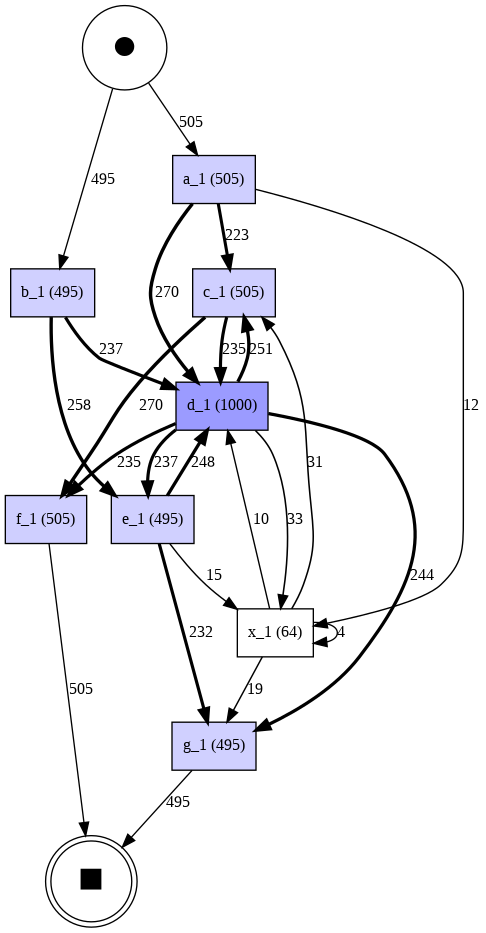



                  DFG FROM EVENT LOGS GATHERED                  



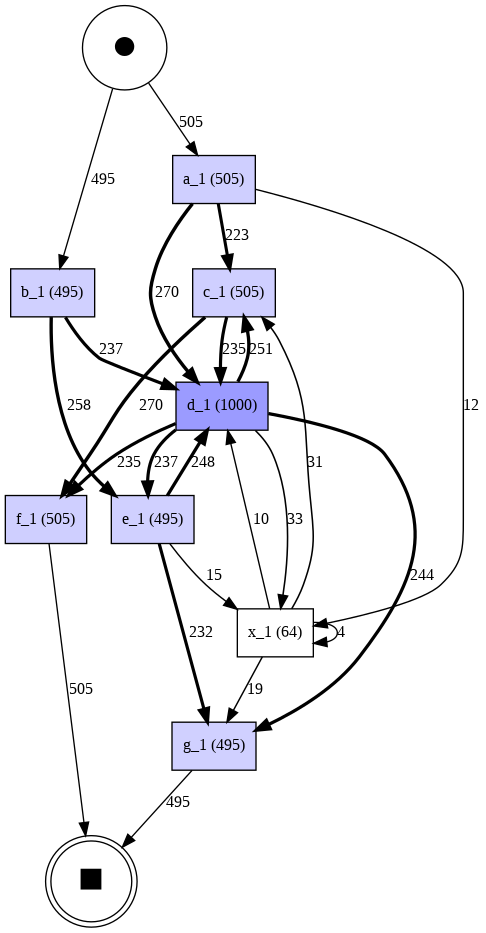

In [2]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py

from os.path import basename
from os import remove, rename
from re import split
from pm4py.streaming.stream.live_event_stream import LiveEventStream
from pm4py.streaming.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.convert import convert_to_event_stream, convert_to_dataframe
from pm4py.objects.log.obj import EventStream
from pm4py import discover_dfg, view_dfg, get_start_activities, get_end_activities
from pandas import DataFrame, read_csv, concat

display = False
show = False
online = False
address = "127.0.0.1"
port = "8192"
case_id = 'case:concept:name'
from_csv_to_dfg = {'case':case_id, 'activity':'concept:name', 'time':'time:timestamp'}
from_dfg_to_csv = {case_id:'case', 'concept:name':'activity', 'time:timestamp':'time'}


def reading_from_file(file):
    if split(pattern=r'\.', string=basename(file))[-1] == "csv" :
        df = read_csv(file, sep=';').rename(columns = from_csv_to_dfg)
    else:
        df = convert_to_dataframe(read_xes(file)).rename(columns={'event_attr: E:time:time':'time:timestamp'})
    return convert_to_event_stream(df)


def enhance_dfg():
    global dfg
    keys = dfg.keys()
    for edge in dfg_stream.keys():
        if edge in keys:
            dfg[edge] += dfg_stream[edge]
        else:
            dfg[edge] = dfg_stream[edge]
    #print(dfg)

def dfg_production(stream):
    global dfg_stream
    dfg_stream, _, _, _ = stream.get()
    if display:
        print(dfg_stream)
    #enhance_dfg(dfg_stream)
    global start_activities, end_activities
    start_activities = get_start_activities(total_log)
    end_activities = get_end_activities(total_log)
    
    # if show:
    #     print(f"{'DFG TEST':^64}\n")
    #     view_dfg(dfg, start_activities, end_activities)
    #     print("\n\n")


def function(stream_dfg_disc, log, copy = True):
    toAppend = convert_to_dataframe(EventStream(log))
    # print(type(toAppend))
    global total_log
    total_log = concat([total_log, toAppend], ignore_index=True)
    dfg_production(stream_dfg_disc)
    if copy:
        total_log.copy().rename(columns=from_dfg_to_csv).to_csv("Saved_event_log.csv", sep=';')
    else:
        total_log.rename(columns=from_dfg_to_csv).to_csv("Saved_event_log.csv", sep=';')


def log_stream_from_file(event_log, live_stream, stream_dfg_disc, window):
    # print("In log_stream_from_file, df is", type(event_log))
    log = []
    i = 0
    #print(event_log[0][case_id])
    last_case = event_log[0][case_id]
    live_stream.start()
    

    # fase processazione eventi:
    for index, event in enumerate(event_log, start = 1):
        # print(type(event), "\n-", event, "\n--", event["case:concept:name"])

        if len(log) != 0 and event[case_id] != last_case:
            # print("Case finito...\n")
            function(stream_dfg_disc, log)
            log = []
            log.append(event)
            live_stream.append(event)
            last_case = event[case_id]
            i = index
            continue
        #else:
        live_stream.append(event)
        log.append(event)
            # print("Adding new event...", type(log))

        #finestra di eventi piena con case di ultimo evento uguale 
        if index - i == window:
            print("\tFinestra di eventi piena!")
            function(stream_dfg_disc, log)
            # print("\nlog È lungo ", len(log), "\n")
            log = []
            i = index

    live_stream.stop()
    function(stream_dfg_disc, log, True)
    enhance_dfg()
    print(f"{'DFG TEST':^64}\n")
    view_dfg(dfg, start_activities, end_activities)
    print("\n\n")
    


def execute_script(file_path, window = 8):
    live_stream = LiveEventStream()
    stream_dfg_disc = dfg_discovery.apply()
    live_stream.register(stream_dfg_disc)

    if online:
        event_stream = EventStream()
        #...
    else:
        event_log = reading_from_file(file_path)
        # print("Event_log type =", type(event_log))
        log_stream_from_file(event_log, live_stream, stream_dfg_disc, window)


    # remove("Starting_event_log.csv")
    # rename("Saved_event_log.csv", "Starting_event_log.csv")


if __name__ == "__main__":
    global total_log
    total_log = read_csv("Starting_event_log.csv", sep=';').rename(columns = from_csv_to_dfg)
    global dfg, start_activities, end_activities
    dfg, start_activities, end_activities = discover_dfg(total_log)

    print(f"{'INITIAL DFG ':^64}\n")
    view_dfg(dfg, start_activities, end_activities)
    print("\n\n")

    execute_script("New_event_log.csv")
    display = True
    execute_script("New_event_log_2.csv", 4)
    print(f"\n\n{'TOTAL DFG':^64}\n")
    view_dfg(dfg, start_activities, end_activities)    
    dfg_t, s_a, e_a = discover_dfg(read_csv("event_log_choice_1_1000.csv", sep=';').rename(columns=from_csv_to_dfg))
    print(f"\n\n{'DFG FROM ORIGINAL CSV FILE':^64}\n")
    view_dfg(dfg_t, s_a, e_a)
    dfg_t, s_a, e_a = discover_dfg(read_csv("Saved_event_log.csv", sep=';').rename(columns=from_csv_to_dfg))
    print(f"\n\n{'DFG FROM EVENT LOGS GATHERED':^64}\n")
    view_dfg(dfg_t, s_a, e_a)

### sviluppo incrementale stream accantonato

                  event_log_choice_1_1000.xes                   



parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

1000
INDEX è  999 

                            DFG TEST                            






INDEX è  1999 

                            DFG TEST                            



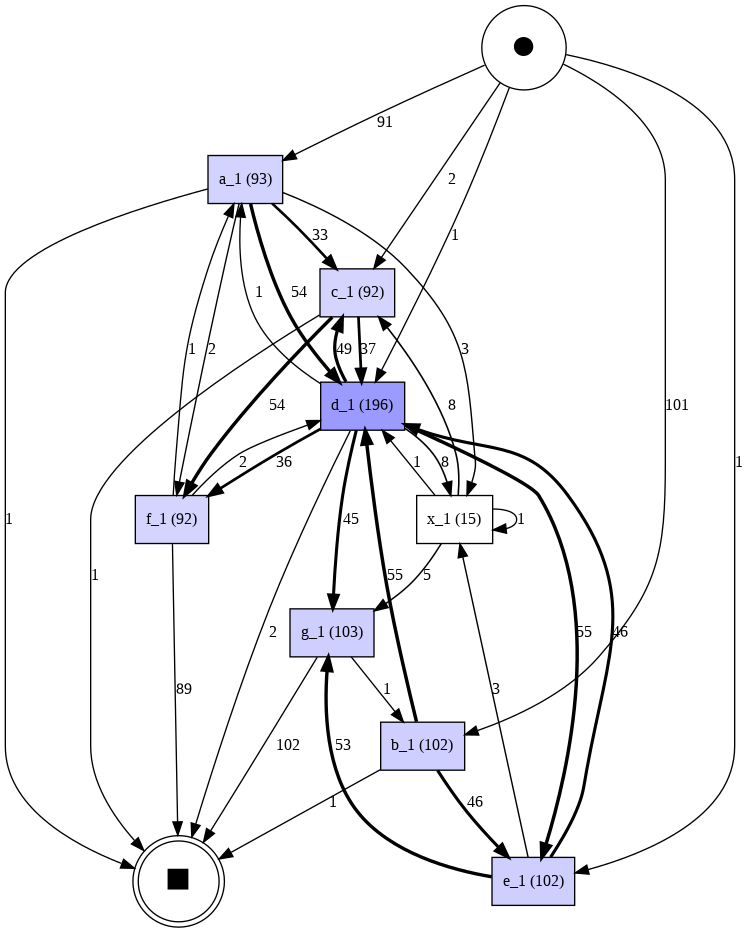




INDEX è  2999 

                            DFG TEST                            



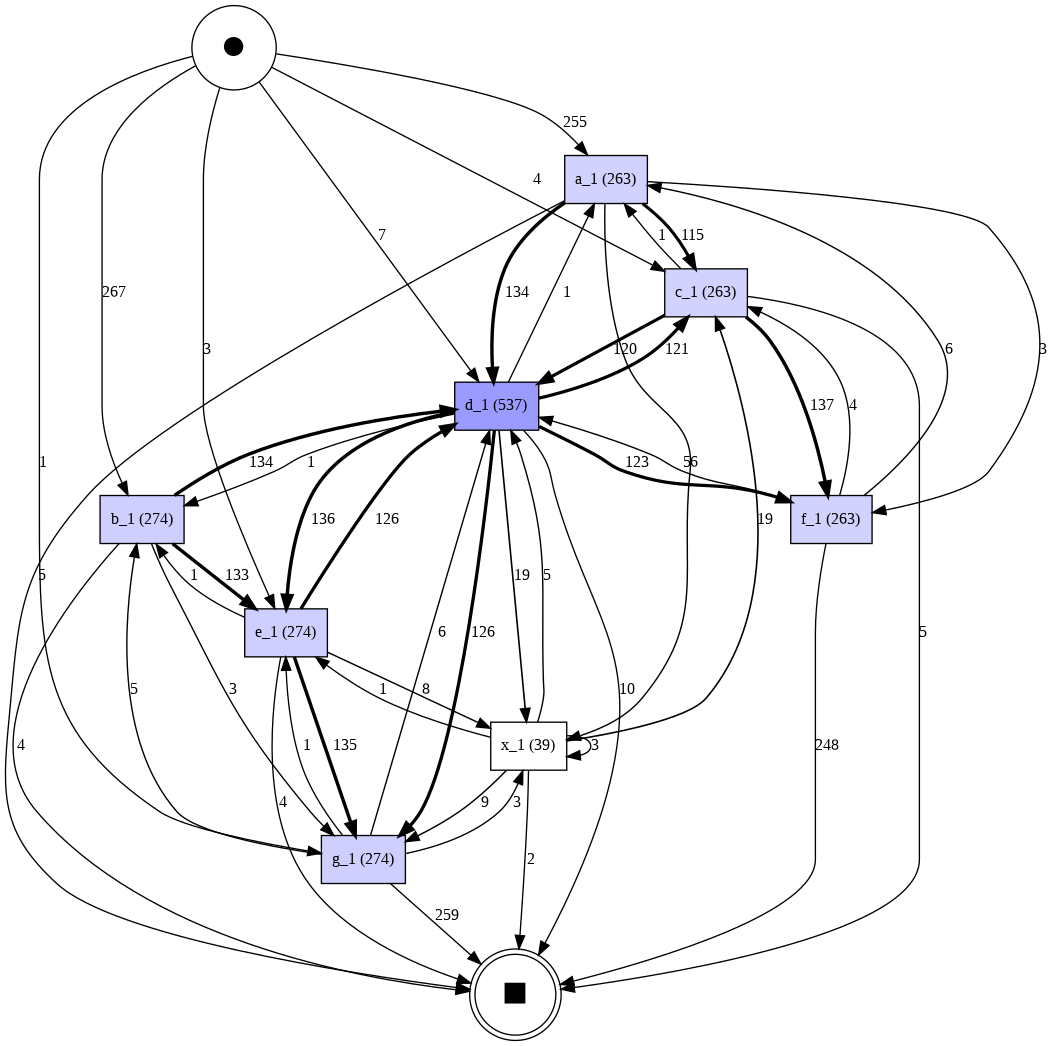




INDEX è  3999 

                            DFG TEST                            



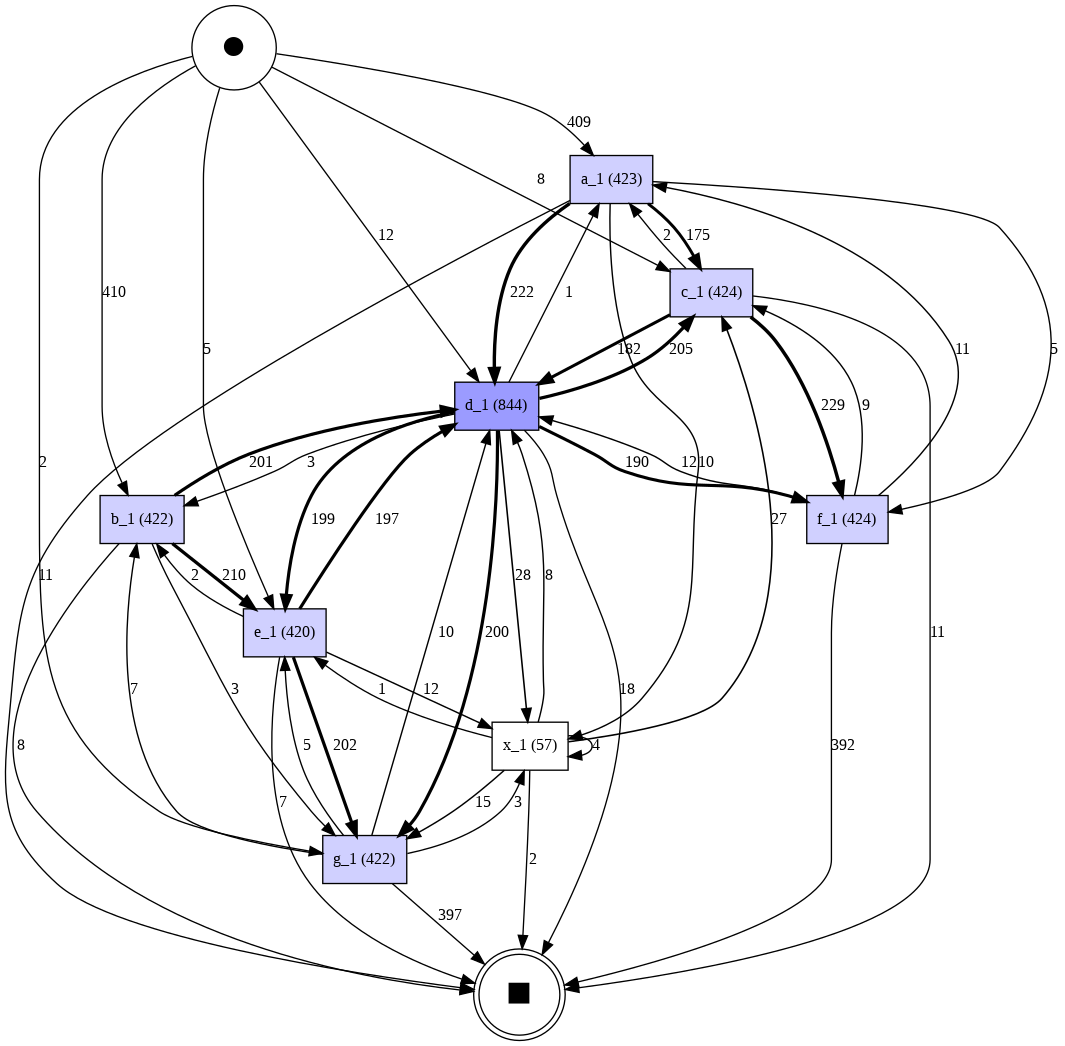




                            DFG TEST                            



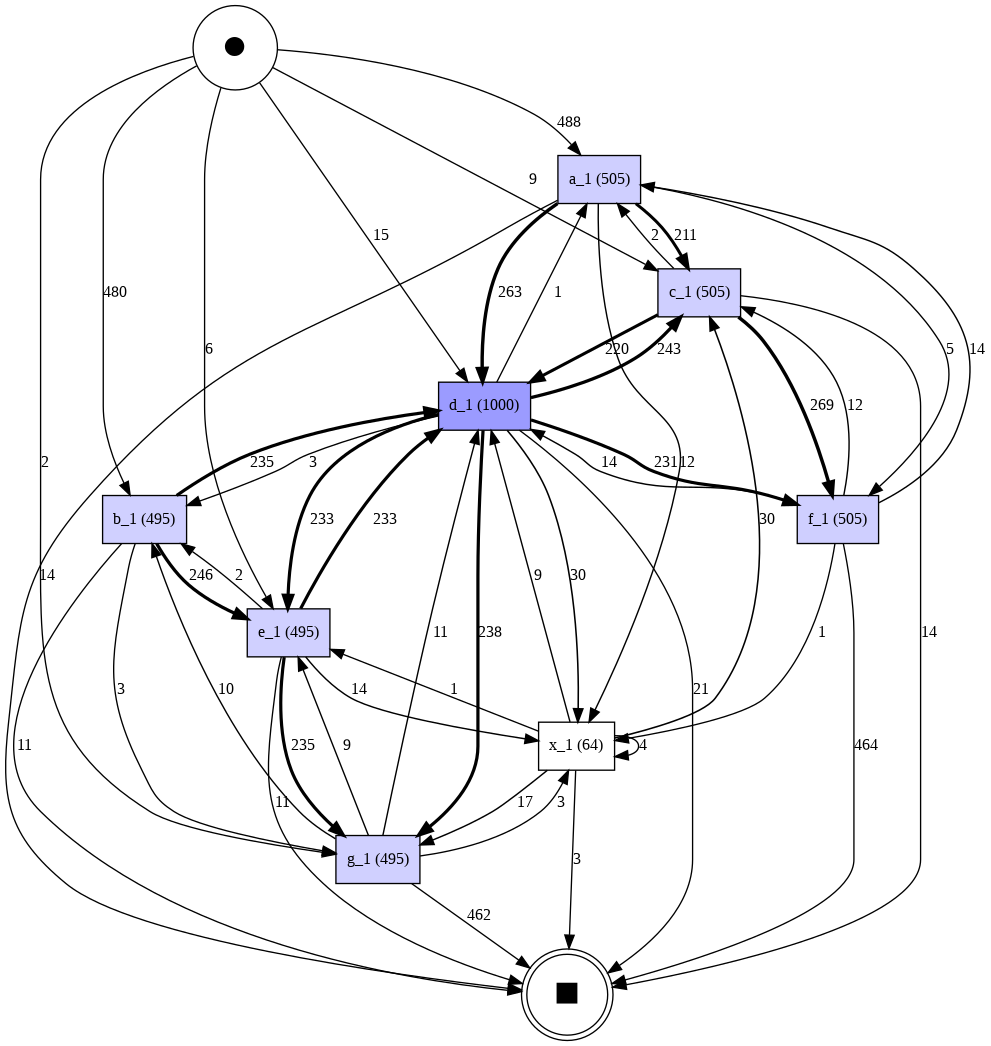




                  event_log_choice_2_1000.xes                   



parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

4049
INDEX è  999 

                            DFG TEST                            






INDEX è  1999 

                            DFG TEST                            



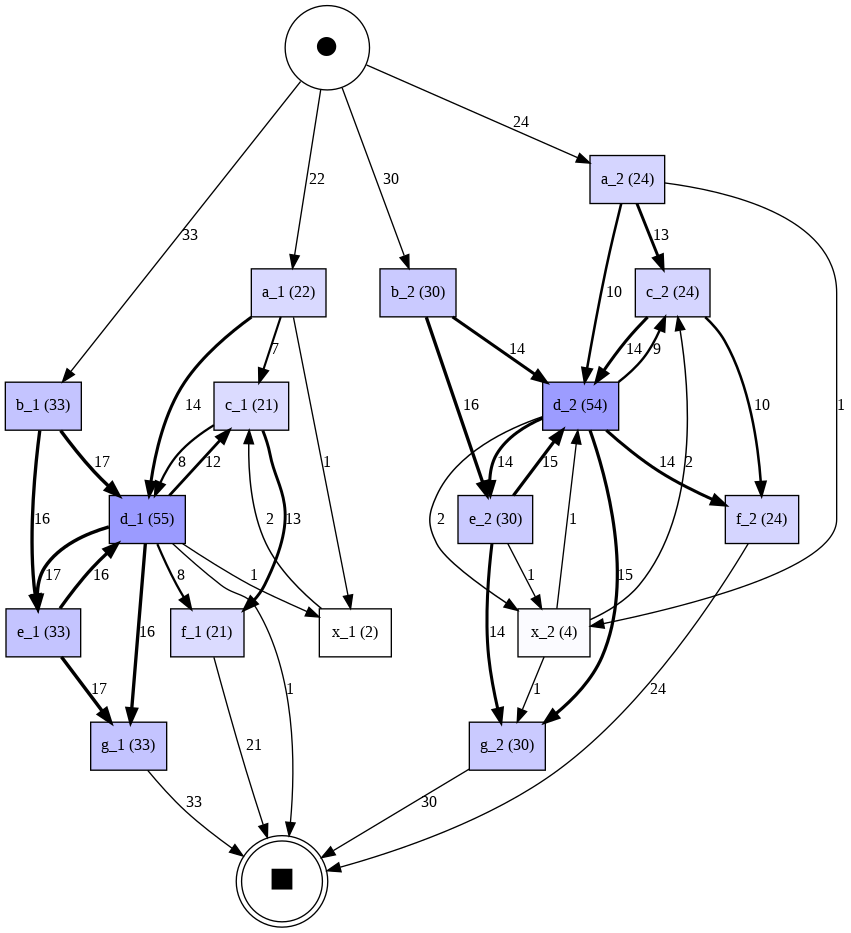




INDEX è  2999 

                            DFG TEST                            



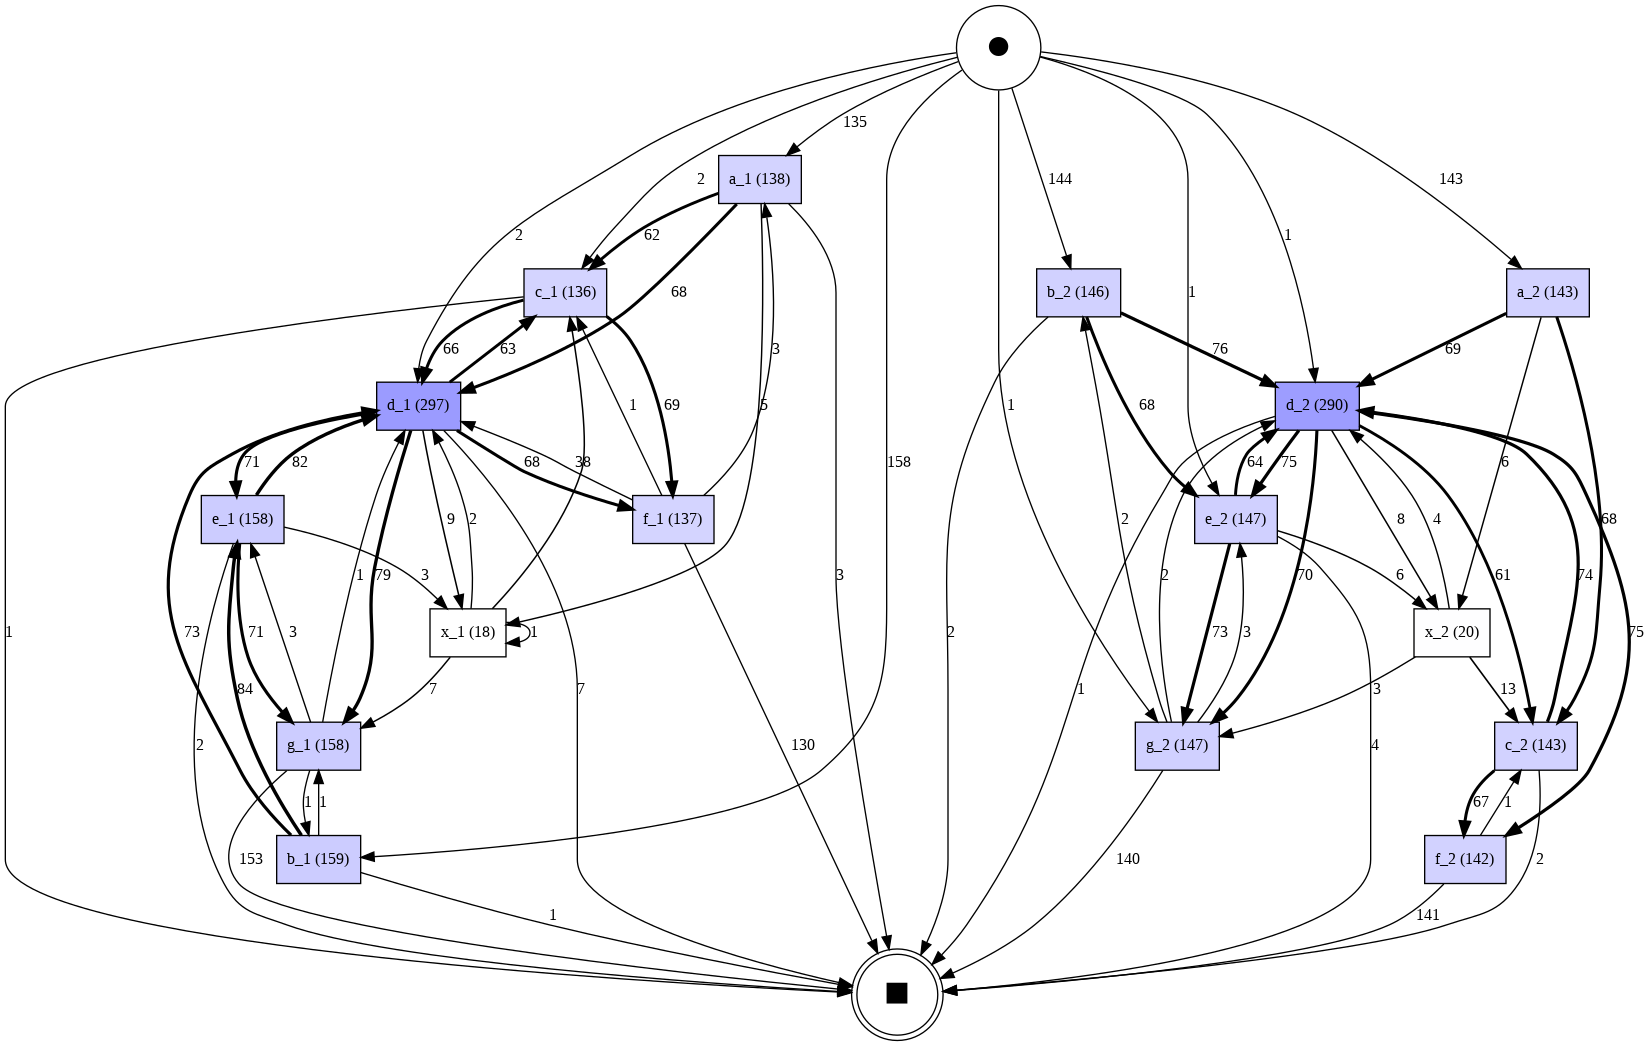




INDEX è  3999 

                            DFG TEST                            



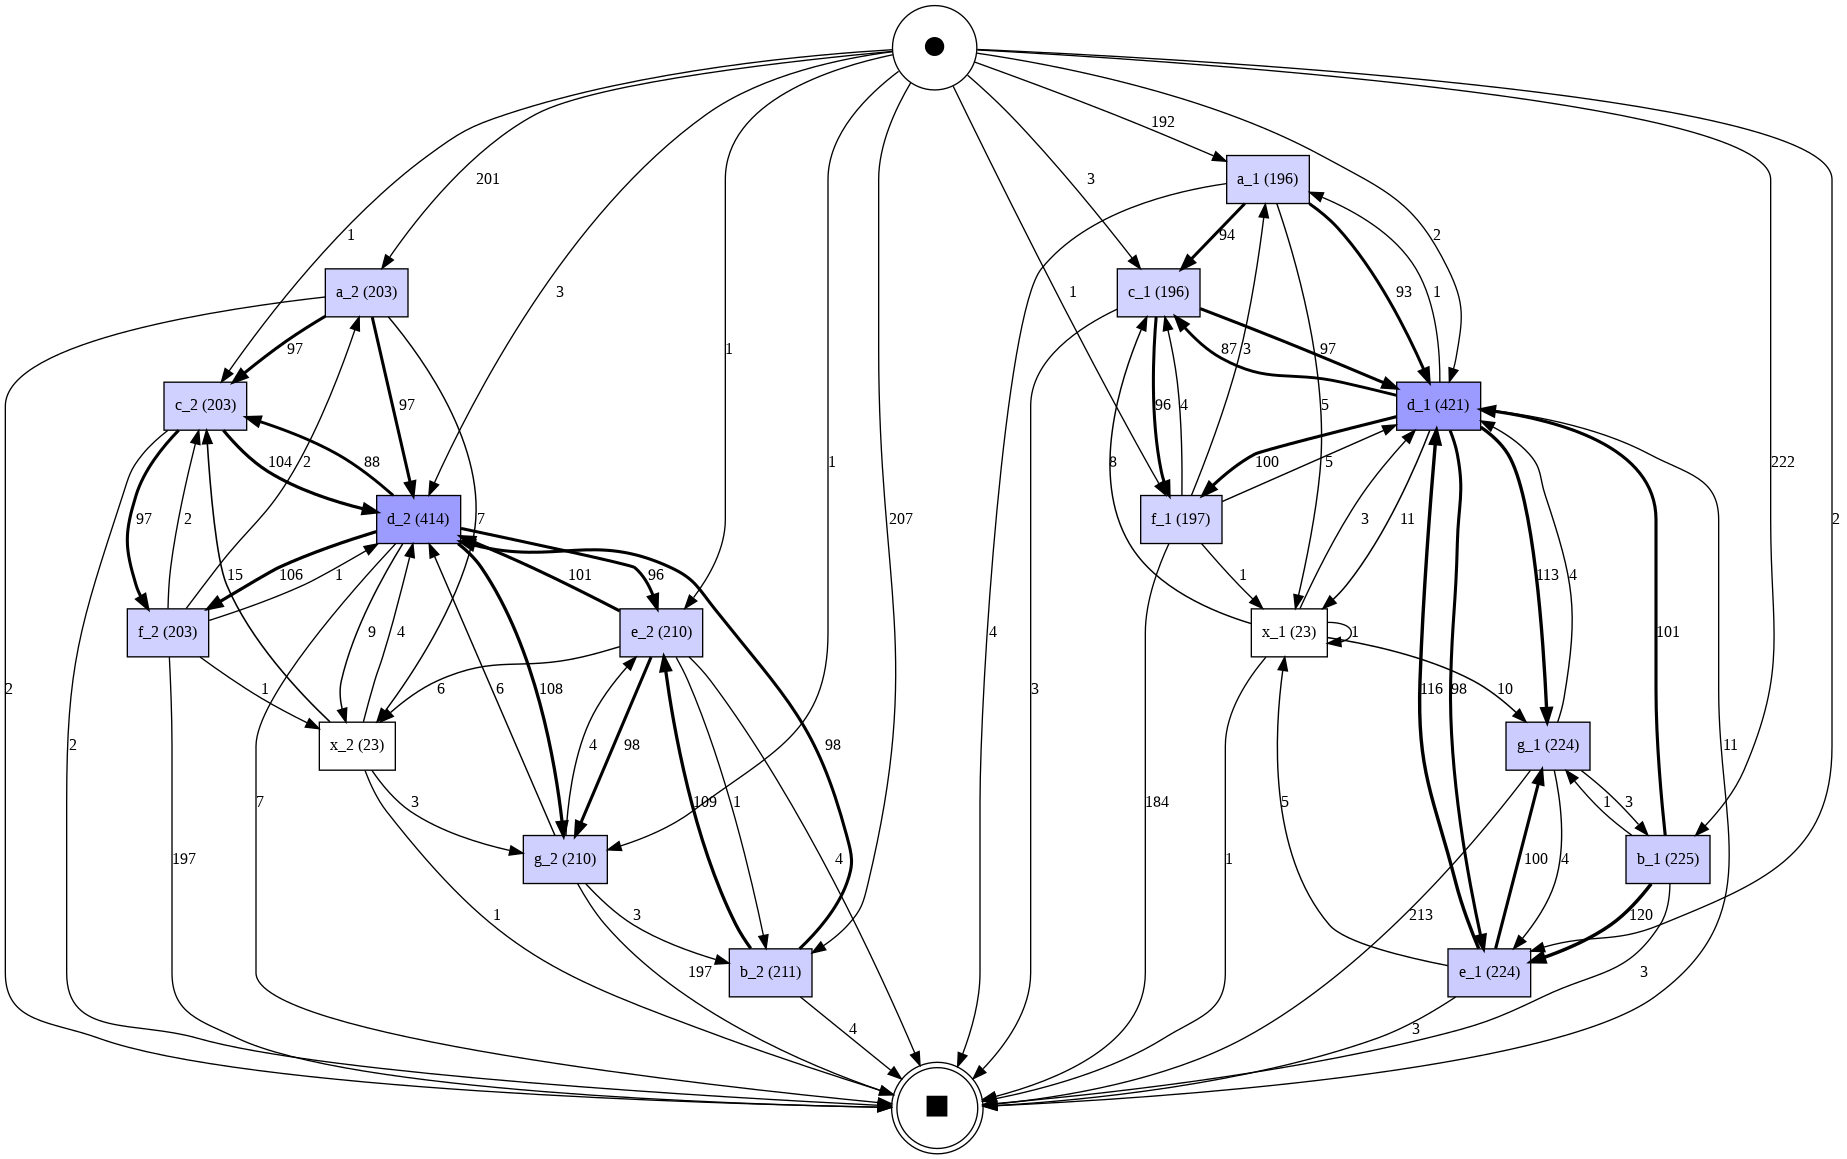




                            DFG TEST                            



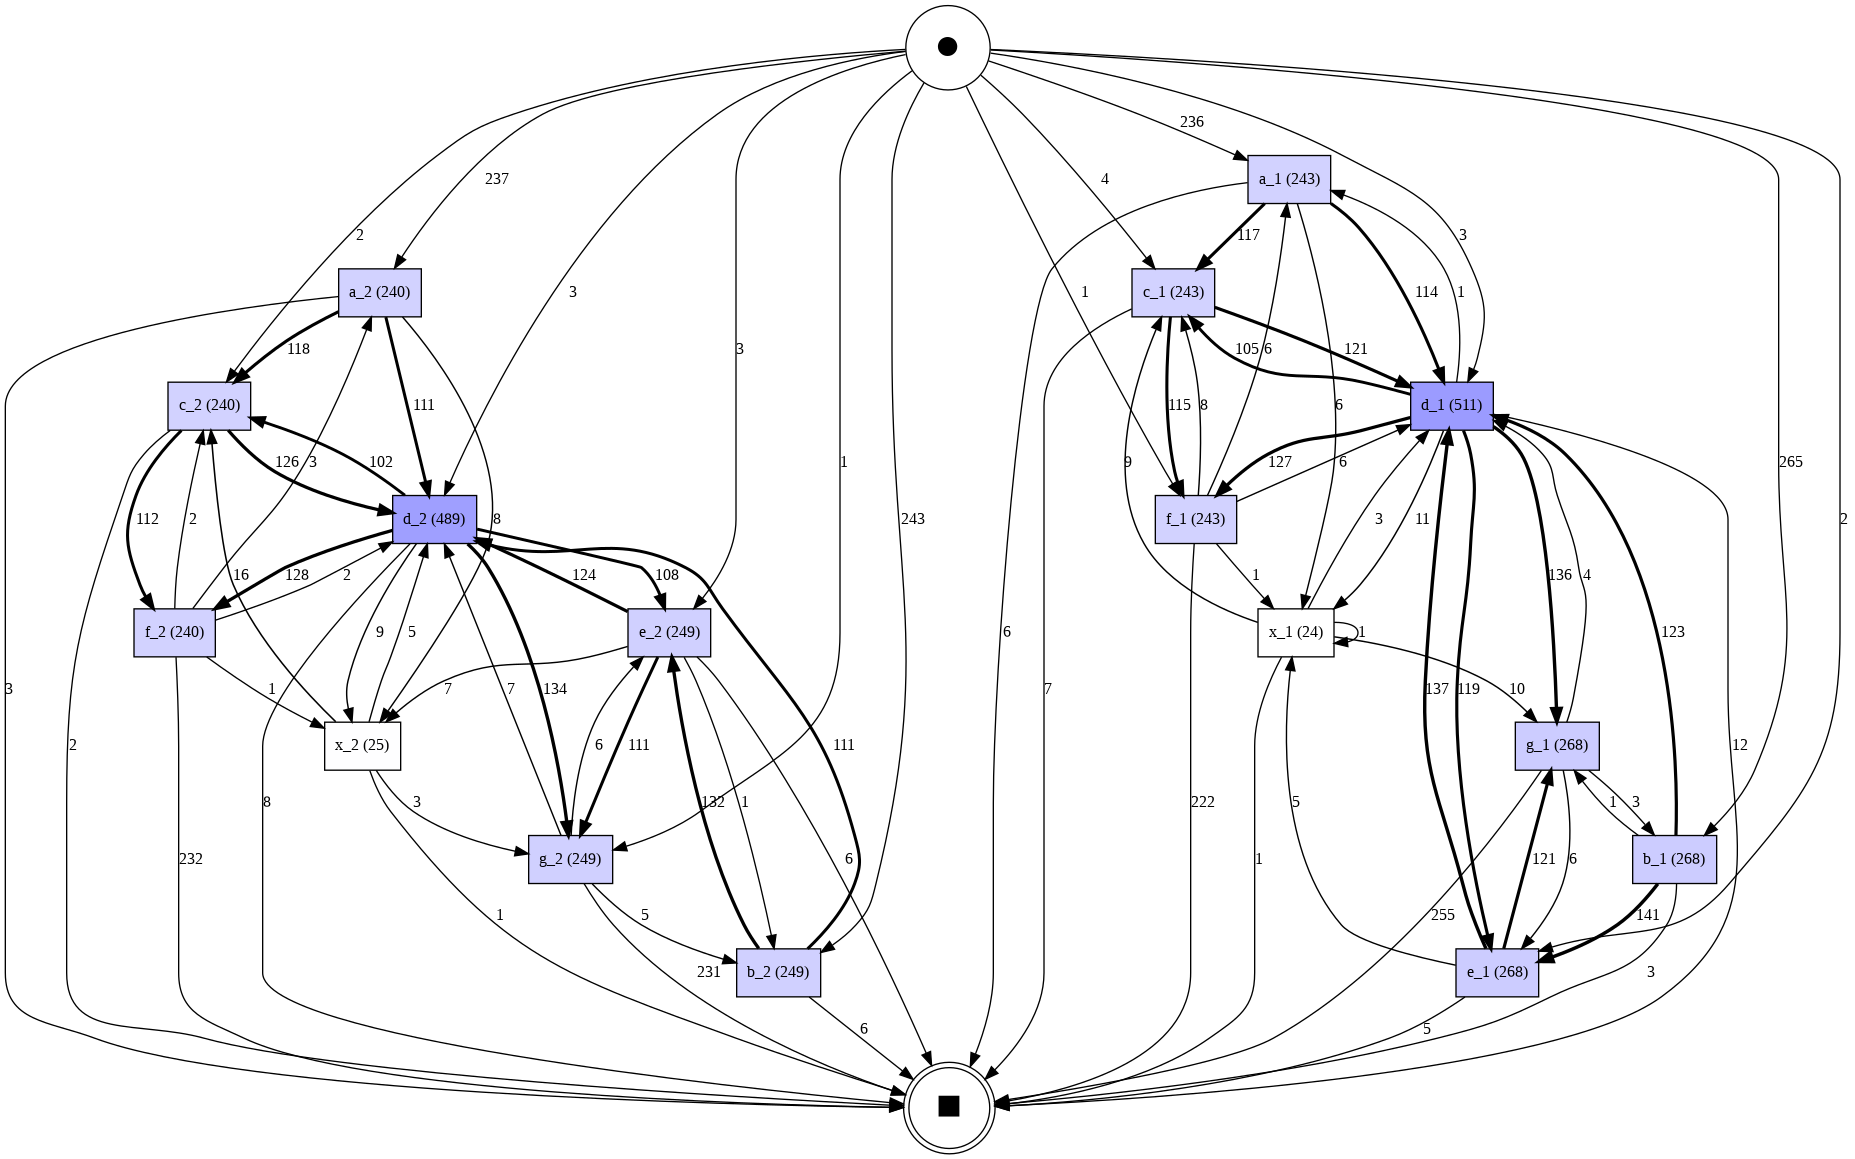

In [ ]:
from sys import modules 

modulename = 'pm4py'
if modulename not in modules:
    print('Importing the {} module'.format(modulename))
    !pip install pm4py
    import pm4py

from os.path import join
from pm4py.streaming.stream.live_event_stream import LiveEventStream, Parameters
from pm4py.streaming.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pandas import read_csv, concat, to_csv

flag = True
log = None

def loading_process_model_base(file):
    global log, dfg, start_activities, end_activities
    if log is None:
        log = pm4py.convert_to_dataframe(pm4py.read_xes(file))[:500]
    dfg, start_activities, end_activities = pm4py.discover_dfg(log)
    print(f"\n{'Initial process model':^64}\n")
    pm4py.view_dfg(dfg, start_activities, end_activities)


def enhance_dfg(new_dfg):
    global dfg
    keys = dfg.keys()
    for edge in new_dfg.keys():
        if edge in keys:
            dfg[edge] += new_dfg[edge]
        else:
            dfg[edge] = new_dfg[edge]
    

def dfg_production(stream):
    global log, dfg, start_activities, end_activities
    # gets the DFG along with the start and end activities from the stream
    new_dfg, _, _, _ = stream.get()
    enhance_dfg(new_dfg)
    start_activities = pm4py.get_start_activities(log)
    end_activities = pm4py.get_end_activities(log)
    # visualize the DFG
    print(f"{'DFG TEST':^64}\n")
    pm4py.view_dfg(dfg, start_activities, end_activities)
    print("\n\n")

def from_EventLog_to_DFG():
    #print(f"{file_path:^64}\n")
    global log
       
    live_stream = LiveEventStream()
    stream_dfg_disc = dfg_discovery.apply()
    live_stream.register(stream_dfg_disc)
    live_stream.start()
    
    index = 0
    while True:
        # wait data: log = ...
        if new_event == "":
            break
        #conversione stringhe qui
        event = pm4py.convert_to_event_stream(new_event)
        live_stream.append(event)
        log = concat[log, new_log]
        if (index + 1) % 1000 == 0:
            print("INDEX è ", index, "\n")
            dfg_production(stream_dfg_disc)
            to_csv("event_log.csv")
        index += 1

    live_stream.stop()
    dfg_production(stream_dfg_disc)

if __name__ == "__main__":
    loading_process_model_base("event_log_choice_1_1000.xes")
    from_EventLog_to_DFG()
    # execute_script("event_log_choice_1_1000.xes")
    # execute_script("event_log_choice_2_1000.xes")
    # execute_script("event_log_choice_5_1000.xes")
    # extracting_event_log()